# 1. IMPORTS

In [104]:
import pandas as pd
import numpy as np
import re  # This imports the regular expressions module
%matplotlib inline
import matplotlib.pyplot as plt

DATA_FOLDER = 'Data/'

CHARACTER_METADATA_DATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_METADATA_DATASET = DATA_FOLDER+"movie.metadata.tsv"


In [105]:
column_names_character = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]

column_names_movie = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie name',
    'Movie release date',
    'Movie box office revenue',
    'Movie runtime',
    'Movie languages',
    'Movie countries',
    'Movie genres'
]
df_character=pd.read_csv(CHARACTER_METADATA_DATASET, sep='\t', names = column_names_character)
df_movie=pd.read_csv(MOVIE_METADATA_DATASET, sep='\t', names = column_names_movie)


In [106]:
row_with_id_3333 = df_movie[df_movie['Wikipedia movie ID'] == 3333]
row_with_id_3333

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
2634,3333,/m/0151l,The Birth of a Nation,1915,50000000.0,190.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."


In [107]:
# Columns we will use for our project
df = df_movie[['Wikipedia movie ID', 'Movie name', 'Movie release date','Movie box office revenue','Movie runtime','Movie languages','Movie countries','Movie genres']] # and themes to add
df.set_index('Wikipedia movie ID', inplace=True)

df

,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,
975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...
35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
34980460,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
9971909,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"


In [108]:
is_unique = df.index.is_unique
print("Is the index unique?", is_unique)

Is the index unique? True


In [109]:
df.dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 81741 entries, 975900 to 12476867
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie name                81741 non-null  object 
 1   Movie release date        74839 non-null  object 
 2   Movie box office revenue  8401 non-null   float64
 3   Movie runtime             61291 non-null  float64
 4   Movie languages           81741 non-null  object 
 5   Movie countries           81741 non-null  object 
 6   Movie genres              81741 non-null  object 
dtypes: float64(2), object(5)
memory usage: 7.0+ MB


# 2. Data handling

## Clean dates

In [110]:
#Problem : We don't have the day and month for many movies (+- half) and some don't have a date at all.
#Solution : Create a "year" column and "day-month" column with nan values when it's missing. 
# Extract the first 4 characters, handling NaNs
df_treated = df.copy()
df_treated['Movie release year'] = df_treated['Movie release date'].str[:4].astype('Int32') #7k nans


cols = list(df_treated.columns)
cols.insert(1, cols.pop(cols.index('Movie release year')))
df_treated = df_treated[cols]

df_treated['Movie release date'] = pd.to_datetime(df_treated['Movie release date'], errors='coerce') #42k nans
df_treated['Movie release month'] = df_treated['Movie release date'].dt.strftime('%m').astype('Int32')

print(df_treated['Movie release date'].isna().sum())
print(df_treated['Movie release year'].isna().sum())
print(df_treated['Movie release month'].isna().sum())

cols = list(df_treated.columns)
cols.insert(1, cols.pop(cols.index('Movie release month')))
df_treated = df_treated[cols]
df_treated.head(20) 




42369
6902
42369


,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,,
975900,Ghosts of Mars,8,2001,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2,2000,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,Brun bitter,<NA>,1988,NaT,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,White Of The Eye,<NA>,1987,NaT,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,A Woman in Flames,<NA>,1983,NaT,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
13696889,The Gangsters,5,1913,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
18998739,The Sorcerer's Apprentice,<NA>,2002,NaT,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
10408933,Alexander's Ragtime Band,8,1938,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
9997961,Contigo y aquí,<NA>,1974,NaT,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."


In [111]:
df_treated.dtypes


Movie name                          object
Movie release month                  Int32
Movie release year                   Int32
Movie release date          datetime64[ns]
Movie box office revenue           float64
Movie runtime                      float64
Movie languages                     object
Movie countries                     object
Movie genres                        object
dtype: object

In [112]:
df_treated['Movie release year'].value_counts().sort_index()
#one movie during the Middle Ages !!
df_treated = df_treated[df_treated['Movie release year'] != 1010]

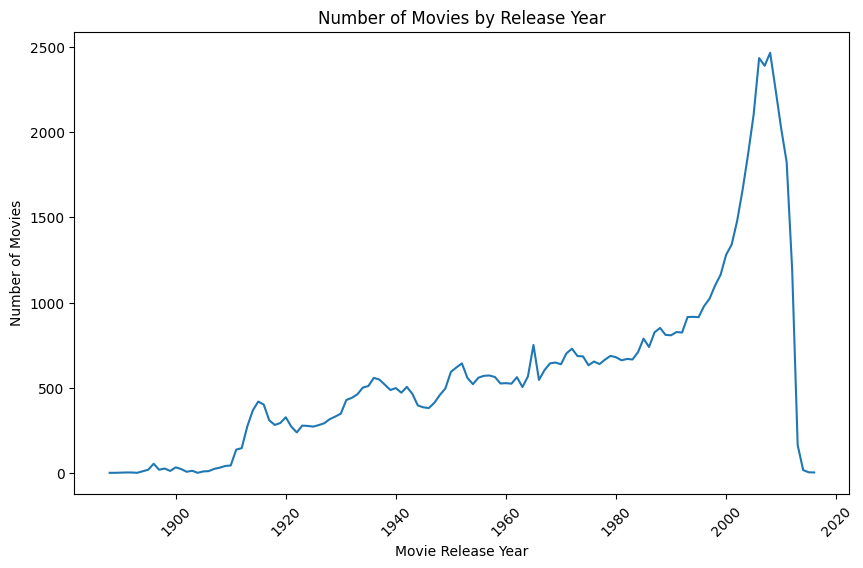

In [113]:
plt.figure(figsize=(10, 6))
df_treated['Movie release year'].value_counts().sort_index().plot(kind='line')
plt.xlabel("Movie Release Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Release Year")
plt.xticks(rotation=45)
plt.show()

## Box office

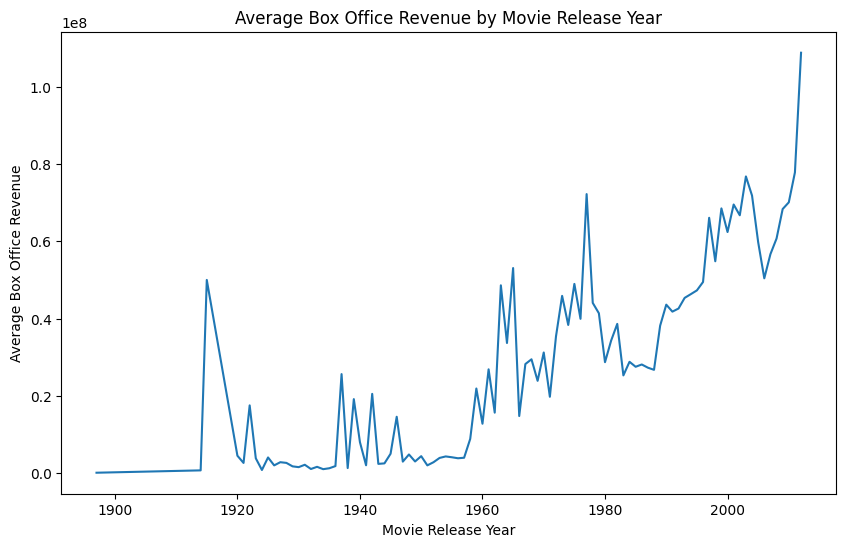

In [114]:
df_plot = df_treated.dropna(subset=['Movie release year', 'Movie box office revenue'])
average_revenue_per_year = df_plot.groupby('Movie release year')['Movie box office revenue'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_revenue_per_year.index, average_revenue_per_year.values)
plt.xlabel("Movie Release Year")
plt.ylabel("Average Box Office Revenue")
plt.title("Average Box Office Revenue by Movie Release Year")
plt.show()

In [115]:
#Problem : one cannot compare two box office values between each other as there is inflation over time and the box office revenues were measured in different years.
#Solution : adjust the (USD) box office revenue by converting the box office revenue to 2024 with the inflation rates. 
inflation_data = {
    1914: 1.3, 1915: 0.9, 1916: 7.7, 1917: 17.8, 1918: 17.3, 
    1919: 15.2, 1920: 15.6, 1921: -10.9, 1922: -6.2, 1923: 1.8, 
    1924: 0.4, 1925: 2.4, 1926: 0.9, 1927: -1.9, 1928: -1.2, 
    1929: 0.0, 1930: -2.7, 1931: -8.9, 1932: -10.3, 1933: -5.2, 
    1934: 3.5, 1935: 2.6, 1936: 1.0, 1937: 3.7, 1938: -2.0, 
    1939: -1.3, 1940: 0.7, 1941: 5.1, 1942: 10.9, 1943: 6.0, 
    1944: 1.6, 1945: 2.3, 1946: 8.5, 1947: 14.4, 1948: 7.7, 
    1949: -1.0, 1950: 1.1, 1951: 7.9, 1952: 2.3, 1953: 0.8, 
    1954: 0.3, 1955: -0.3, 1956: 1.5, 1957: 3.3, 1958: 2.7, 
    1959: 1.08, 1960: 1.5, 1961: 1.1, 1962: 1.2, 1963: 1.2, 
    1964: 1.3, 1965: 1.6, 1966: 3.0, 1967: 2.8, 1968: 4.3, 
    1969: 5.5, 1970: 5.8, 1971: 4.3, 1972: 3.3, 1973: 6.2, 
    1974: 11.1, 1975: 9.1, 1976: 5.7, 1977: 6.5, 1978: 7.6, 
    1979: 11.3, 1980: 13.5, 1981: 10.3, 1982: 6.1, 1983: 3.2, 
    1984: 4.3, 1985: 3.5, 1986: 1.9, 1987: 3.7, 1988: 4.1, 
    1989: 4.8, 1990: 5.4, 1991: 4.2, 1992: 3.0, 1993: 3.0, 
    1994: 2.6, 1995: 2.8, 1996: 2.9, 1997: 2.3, 1998: 1.6, 
    1999: 2.2, 2000: 3.4, 2001: 2.8, 2002: 1.6, 2003: 2.3, 
    2004: 2.7, 2005: 3.4, 2006: 3.2, 2007: 2.9, 2008: 3.8, 
    2009: -0.4, 2010: 1.6, 2011: 3.2, 2012: 2.1, 2013: 1.5, 
    2014: 1.6, 2015: 0.1, 2016: 1.3, 2017: 2.1, 2018: 2.4, 
    2019: 1.8, 2020: 1.2, 2021: 4.7, 2022: 8.0, 2023: 4.1, 2024: 3.2
}

#source : minesota website

def adjust_for_inflation(year, amount, inflation_data):
    """
    Adjusts the given amount from the provided year to 2024 based on annual inflation rates.

    Parameters:
    year (int): The starting year.
    amount (float): The amount to be adjusted.
    inflation_data (dict): A dictionary with years as keys and inflation rates as values.

    Returns:
    float: The inflation-adjusted amount for 2024.
    """
    # Initialize the adjusted amount
    adjusted_value = amount
    
    # Loop through each year from the given year to 2024
    for y in range(year, 2024):
        if y in inflation_data:
            inflation_rate = inflation_data[y]
            # Adjust for inflation for each year
            adjusted_value *= (1 + inflation_rate / 100)
        else:
            print(f"Warning: No inflation data available for year {y}. Assuming 0% inflation.")
    
    return adjusted_value


for i in range(len(df_treated)):
    # Check if both the release date and box office revenue are not NaN
    if pd.notna(df_treated.iloc[i]['Movie release year']) and pd.notna(df_treated.iloc[i]['Movie box office revenue']):
        # Extract the year from the release date
        release_year = df_treated['Movie release year'].iloc[i]
        
        # Adjust the box office revenue for inflation
        adjusted_revenue = adjust_for_inflation(release_year, df_treated.iloc[i]['Movie box office revenue'], inflation_data)
        
        # Update the DataFrame with the adjusted revenue using iloc
        df_treated.iloc[i, df_treated.columns.get_loc('Movie box office revenue')] = adjusted_revenue
 
df_treated.head(10)

,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,,
975900,Ghosts of Mars,8,2001,2001-08-24,2.477118e+07,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2,2000,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,Brun bitter,<NA>,1988,NaT,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,White Of The Eye,<NA>,1987,NaT,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,A Woman in Flames,<NA>,1983,NaT,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
13696889,The Gangsters,5,1913,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
18998739,The Sorcerer's Apprentice,<NA>,2002,NaT,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
10408933,Alexander's Ragtime Band,8,1938,1938-08-16,7.619573e+07,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
9997961,Contigo y aquí,<NA>,1974,NaT,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."


In [116]:
filtered_df = df_treated[(df_treated['Movie box office revenue'] >= 1.517601e+08) & (df_treated['Movie release year'] == 1915)]
filtered_df

,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,,
3333,The Birth of a Nation,<NA>,1915,NaT,1.517601e+09,190.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."


In [117]:
df_plot = df_treated.dropna(subset=['Movie release year', 'Movie box office revenue'])
average_revenue_stats = df_plot.groupby('Movie release year')['Movie box office revenue'].agg(['mean', 'count'])
average_revenue_stats.columns = ['Average Revenue', 'Sample Count']
average_revenue_stats.head(20)



,Average Revenue,Sample Count
Movie release year,,
1897,3.074659e+06,1
1914,2.176650e+07,4
1915,1.517601e+09,1
1920,7.895823e+07,1
1921,3.996988e+07,3
1922,2.986451e+08,1
1923,6.963753e+07,2
1924,1.439003e+07,3
1925,7.200744e+07,5


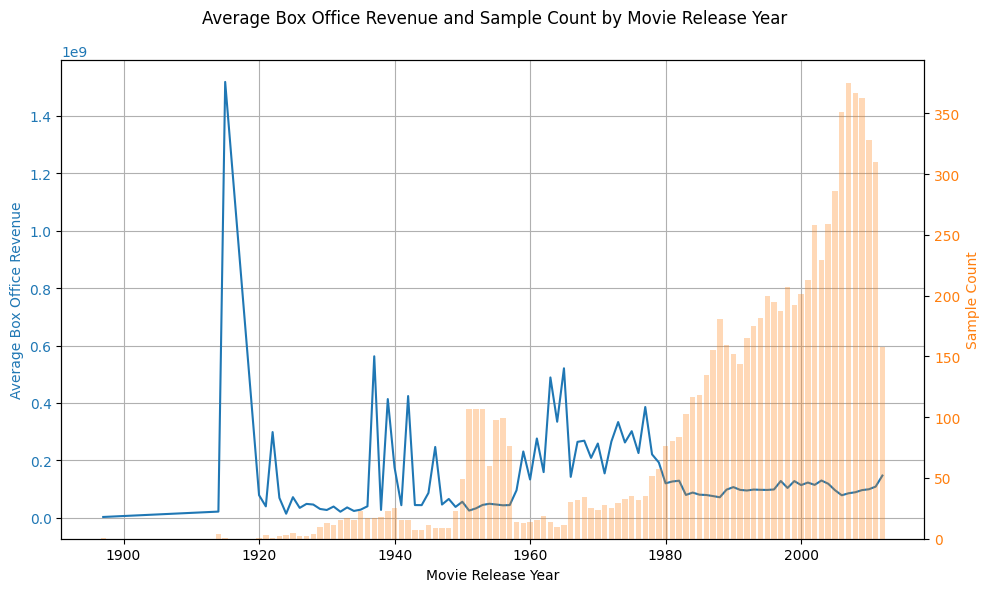

In [118]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average revenue on the first y-axis
ax1.set_xlabel("Movie Release Year")
ax1.set_ylabel("Average Box Office Revenue", color="tab:blue")
ax1.plot(average_revenue_stats.index, average_revenue_stats['Average Revenue'], color="tab:blue", label="Average Revenue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.grid(True)

# Create a second y-axis for the sample count
ax2 = ax1.twinx()
ax2.set_ylabel("Sample Count", color="tab:orange")
ax2.bar(average_revenue_stats.index, average_revenue_stats['Sample Count'], color="tab:orange", alpha=0.3, label="Sample Count")
ax2.tick_params(axis='y', labelcolor="tab:orange")

# Title and legends
fig.suptitle("Average Box Office Revenue and Sample Count by Movie Release Year")
fig.tight_layout()
plt.show()

## Languages

In [119]:
print(df_treated['Movie languages'].isna().sum())

0


In [120]:

def cleaner(value):
    # Remove `{` and `}`
    value = re.sub(r'[{}]', '', value)
    
    # Extract values after ':' that are in between double quotes
    matches = re.findall(r'":\s*"([^"]+)"', value)
    
    # List of words to remove from each match
    words_to_remove = [" Language", " language", " languages", " Languages","\\u00e0 "]
    
    # Remove unwanted words from each match
    if matches:
        for word in words_to_remove:
            matches = [match.replace(word, "") for match in matches]
        return ', '.join(matches)
    
    return value

def remove_unicode_escapes(value):
    # Remove any Unicode escape sequences like \uXXXX
    return re.sub(r'\\u[0-9a-fA-F]{4}', '', value)

    
df_treated['Movie languages'] = df_treated['Movie languages'].apply(cleaner)
df_treated['Movie languages'] = df_treated['Movie languages'].apply(remove_unicode_escapes)

df_treated.head(20)



,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,,
975900,Ghosts of Mars,8,2001,2001-08-24,2.477118e+07,98.0,English,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2,2000,2000-02-16,NaN,95.0,English,"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,Brun bitter,<NA>,1988,NaT,NaN,83.0,Norwegian,"{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,White Of The Eye,<NA>,1987,NaT,NaN,110.0,English,"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,A Woman in Flames,<NA>,1983,NaT,NaN,106.0,German,"{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
13696889,The Gangsters,5,1913,1913-05-29,NaN,35.0,"Silent film, English","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
18998739,The Sorcerer's Apprentice,<NA>,2002,NaT,NaN,86.0,English,"{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
10408933,Alexander's Ragtime Band,8,1938,1938-08-16,7.619573e+07,106.0,English,"{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
9997961,Contigo y aquí,<NA>,1974,NaT,NaN,NaN,Spanish,"{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."


In [121]:
df_treated['Movie languages'] = df_treated['Movie languages'].apply(lambda x: x.split(', '))
df_treated.head(20)

,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,,
975900,Ghosts of Mars,8,2001,2001-08-24,2.477118e+07,98.0,[English],"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2,2000,2000-02-16,NaN,95.0,[English],"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
28463795,Brun bitter,<NA>,1988,NaT,NaN,83.0,[Norwegian],"{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
9363483,White Of The Eye,<NA>,1987,NaT,NaN,110.0,[English],"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
261236,A Woman in Flames,<NA>,1983,NaT,NaN,106.0,[German],"{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
13696889,The Gangsters,5,1913,1913-05-29,NaN,35.0,"[Silent film, English]","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
18998739,The Sorcerer's Apprentice,<NA>,2002,NaT,NaN,86.0,[English],"{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
10408933,Alexander's Ragtime Band,8,1938,1938-08-16,7.619573e+07,106.0,[English],"{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
9997961,Contigo y aquí,<NA>,1974,NaT,NaN,NaN,[Spanish],"{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."


In [122]:
language_list = sum(df_treated['Movie languages'].tolist(), [])

#print(language_list)

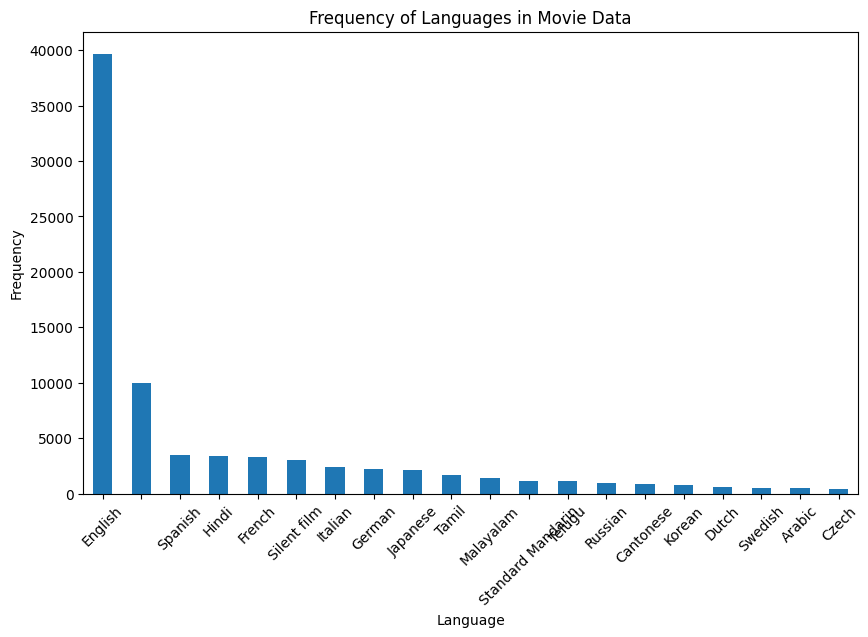

In [123]:
language_counts = pd.Series(language_list).value_counts()

# Plotting the value counts
plt.figure(figsize=(10, 6))
language_counts[:20].plot(kind='bar')
plt.xlabel("Language")
plt.ylabel("Frequency")
plt.title("Frequency of Languages in Movie Data")
plt.xticks(rotation=45)
plt.show()
#empty list is like NaN

In [124]:
language_counts.to_string()

'English                                 39679\n                                        10015\nSpanish                                  3532\nHindi                                    3432\nFrench                                   3323\nSilent film                              3079\nItalian                                  2444\nGerman                                   2189\nJapanese                                 2095\nTamil                                    1726\nMalayalam                                1372\nStandard Mandarin                        1134\nTelugu                                   1109\nRussian                                   981\nCantonese                                 831\nKorean                                    757\nDutch                                     587\nSwedish                                   498\nArabic                                    469\nCzech                                     466\nDanish                                    439\nStandard Can

## Genres

In [125]:
df_treated['Movie genres'] = df_treated['Movie genres'].apply(cleaner)

In [126]:
df_treated['Movie genres'] = df_treated['Movie genres'].apply(lambda x: x.split(', '))
df_treated.head(20)

,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,,
975900,Ghosts of Mars,8,2001,2001-08-24,2.477118e+07,98.0,[English],"{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,..."
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2,2000,2000-02-16,NaN,95.0,[English],"{""/m/09c7w0"": ""United States of America""}","[Mystery, Biographical film, Drama, Crime Drama]"
28463795,Brun bitter,<NA>,1988,NaT,NaN,83.0,[Norwegian],"{""/m/05b4w"": ""Norway""}","[Crime Fiction, Drama]"
9363483,White Of The Eye,<NA>,1987,NaT,NaN,110.0,[English],"{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri..."
261236,A Woman in Flames,<NA>,1983,NaT,NaN,106.0,[German],"{""/m/0345h"": ""Germany""}",[Drama]
13696889,The Gangsters,5,1913,1913-05-29,NaN,35.0,"[Silent film, English]","{""/m/09c7w0"": ""United States of America""}","[Short Film, Silent film, Indie, Black-and-whi..."
18998739,The Sorcerer's Apprentice,<NA>,2002,NaT,NaN,86.0,[English],"{""/m/0hzlz"": ""South Africa""}","[Family Film, Fantasy, Adventure, World cinema]"
10408933,Alexander's Ragtime Band,8,1938,1938-08-16,7.619573e+07,106.0,[English],"{""/m/09c7w0"": ""United States of America""}","[Musical, Comedy, Black-and-white]"
9997961,Contigo y aquí,<NA>,1974,NaT,NaN,NaN,[Spanish],"{""/m/0jgd"": ""Argentina""}","[Musical, Drama, Comedy]"


In [127]:
genres_list = sum(df_treated['Movie genres'].tolist(), [])

#print(genres_list)

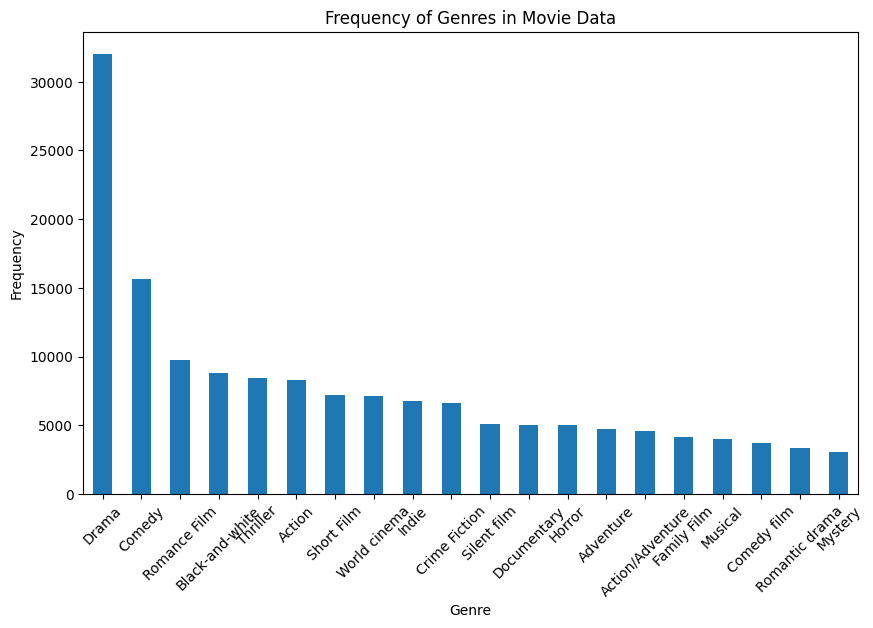

In [128]:
genre_counts = pd.Series(genres_list).value_counts()

# Plotting the value counts
plt.figure(figsize=(10, 6))
genre_counts[:20].plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Frequency of Genres in Movie Data")
plt.xticks(rotation=45)
plt.show()

In [129]:
genre_counts.to_string()

"Drama                                       32014\nComedy                                      15648\nRomance Film                                 9770\nBlack-and-white                              8817\nThriller                                     8407\nAction                                       8275\nShort Film                                   7208\nWorld cinema                                 7155\nIndie                                        6779\nCrime Fiction                                6624\nSilent film                                  5056\nDocumentary                                  4998\nHorror                                       4982\nAdventure                                    4732\nAction/Adventure                             4557\nFamily Film                                  4165\nMusical                                      3984\nComedy film                                  3717\nRomantic drama                               3345\nMystery                       

## Countries

In [130]:
df_treated['Movie countries'] = df_treated['Movie countries'].apply(cleaner)


In [131]:
df_treated['Movie countries'] = df_treated['Movie countries'].apply(lambda x: x.split(', '))
df_treated.head(20)

,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,,
975900,Ghosts of Mars,8,2001,2001-08-24,2.477118e+07,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2,2000,2000-02-16,NaN,95.0,[English],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
28463795,Brun bitter,<NA>,1988,NaT,NaN,83.0,[Norwegian],[Norway],"[Crime Fiction, Drama]"
9363483,White Of The Eye,<NA>,1987,NaT,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
261236,A Woman in Flames,<NA>,1983,NaT,NaN,106.0,[German],[Germany],[Drama]
13696889,The Gangsters,5,1913,1913-05-29,NaN,35.0,"[Silent film, English]",[United States of America],"[Short Film, Silent film, Indie, Black-and-whi..."
18998739,The Sorcerer's Apprentice,<NA>,2002,NaT,NaN,86.0,[English],[South Africa],"[Family Film, Fantasy, Adventure, World cinema]"
10408933,Alexander's Ragtime Band,8,1938,1938-08-16,7.619573e+07,106.0,[English],[United States of America],"[Musical, Comedy, Black-and-white]"
9997961,Contigo y aquí,<NA>,1974,NaT,NaN,NaN,[Spanish],[Argentina],"[Musical, Drama, Comedy]"


In [132]:
countries_list = sum(df_treated['Movie countries'].tolist(), [])

#print(countries_list)

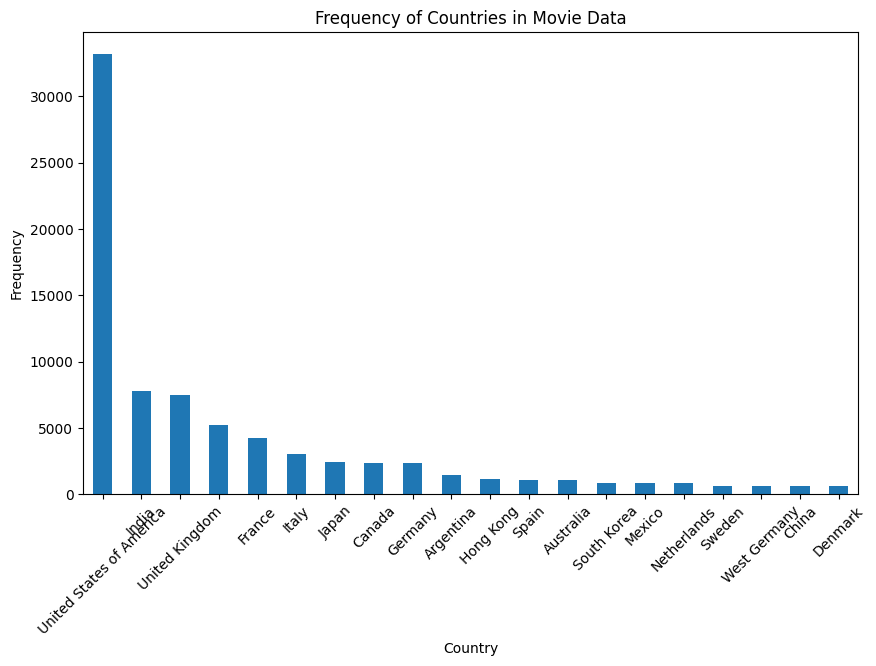

In [133]:
country_counts = pd.Series(countries_list).value_counts()

# Plotting the value counts
plt.figure(figsize=(10, 6))
country_counts[:20].plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Frequency of Countries in Movie Data")
plt.xticks(rotation=45)
plt.show()
#empty is nan

In [134]:
country_counts.to_string()

'United States of America                    33197\nIndia                                        7764\nUnited Kingdom                               7452\n                                             5228\nFrance                                       4199\nItaly                                        3017\nJapan                                        2405\nCanada                                       2372\nGermany                                      2306\nArgentina                                    1418\nHong Kong                                    1115\nSpain                                        1045\nAustralia                                    1038\nSouth Korea                                   861\nMexico                                        844\nNetherlands                                   820\nSweden                                        629\nWest Germany                                  623\nChina                                         611\nDenmark                       

## Runtime

* Must remove entries with unrealistic runtime

In [135]:
# Get the movie names of the long movies
is_long_movie = df_treated['Movie runtime'] > 10000
long_movies = df_treated.loc[df_treated[is_long_movie].index]
long_movies

,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,,
10815585,Zero Tolerance,<NA>,1995,NaT,NaN,1079281.0,[English],[United States of America],"[Thriller, Crime Fiction, Action, Indie, Actio..."


In [136]:
# Get the movie names of movies under a second
is_short_movie = df_treated['Movie runtime'] < 0.0166667

short_movies = df_treated.loc[df_treated[is_short_movie].index]
short_movies

,Movie name,Movie release month,Movie release year,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,,
786716,Dickson Experimental Sound Film,<NA>,1894,NaT,NaN,0.0,[English],[United States of America],[Short Film]


In [137]:
# One film of 18k hours and one of 0sec -> remove them because incorrect data
# Many films of under a minute because they're from 1890-1910

# Define minimum and maximum thresholds for reasonable movie runtimes
min_runtime = 0.01    # Minimum runtime cutoff in minutes
max_runtime = 10000 # Maximum runtime cutoff in minutes

# Filter the DataFrame to include only movies within the specified runtime range
df_treated = df_treated[(df_treated['Movie runtime'] >= min_runtime) & 
                                   (df_treated['Movie runtime'] <= max_runtime)]



In [138]:
df_treated.to_csv('cleaned_data.csv', index=True, encoding='utf-8')